In [64]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import lag_plot

In [15]:
df = pd.read_csv('data/processed_data/covid-19-state-level.csv', index_col=0)

In [36]:
state_cases_ts = df.pivot_table(index='date', columns='state', values='cases', aggfunc=lambda x: max(x), fill_value=0)

In [37]:
state_cases_ts.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,0,0,1,0,7,0,0,0,0,0,...,0,0,2,0,0,0,1,0,1,0
2020-02-16,0,0,1,0,7,0,0,0,0,0,...,0,0,2,0,0,0,1,0,1,0
2020-02-17,0,0,1,0,7,0,0,0,0,0,...,0,0,2,0,0,0,1,0,1,0
2020-02-18,0,0,1,0,7,0,0,0,0,0,...,0,0,2,0,0,0,1,0,1,0
2020-02-19,0,0,1,0,7,0,0,0,0,0,...,0,0,2,0,0,0,1,0,1,0


In [74]:
df['date'].max()

'2020-05-13'

In [54]:
state_cases_ts.sum().idxmax()

'New York'

In [28]:
# from https://worldpopulationreview.com/states

state_population = pd.read_csv('resources/us-state-population.csv')

In [32]:
state_population.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,1,California,39937500,0.0096,39557000,37320900,0.0701,0.1194,256.3728
1,2,Texas,29472300,0.0268,28701800,25242700,0.1676,0.0881,112.8204
2,3,Florida,21993000,0.0326,21299300,18845800,0.1670,0.0658,410.1259
3,4,New York,19440500,-0.0052,19542200,19400100,0.0021,0.0581,412.5218
4,5,Pennsylvania,12820900,0.0011,12807100,12711200,0.0086,0.0383,286.5454


In [43]:
state_pop = {}

for state in state_cases_ts.columns:
    state_info = state_population[state_population['State'] == state]
    state_pop[state] = state_info.iloc[0]['Pop']

In [46]:
state_pop

{'Alabama': 4908620,
 'Alaska': 734002,
 'Arizona': 7378490,
 'Arkansas': 3039000,
 'California': 39937500,
 'Colorado': 5845530,
 'Connecticut': 3563080,
 'Delaware': 982895,
 'District of Columbia': 720687,
 'Florida': 21993000,
 'Georgia': 10736100,
 'Hawaii': 1412690,
 'Idaho': 1826160,
 'Illinois': 12659700,
 'Indiana': 6745350,
 'Iowa': 3179850,
 'Kansas': 2910360,
 'Kentucky': 4499690,
 'Louisiana': 4645180,
 'Maine': 1345790,
 'Maryland': 6083120,
 'Massachusetts': 6976600,
 'Michigan': 10045000,
 'Minnesota': 5700670,
 'Mississippi': 2989260,
 'Missouri': 6169270,
 'Montana': 1086760,
 'Nebraska': 1952570,
 'Nevada': 3139660,
 'New Hampshire': 1371250,
 'New Jersey': 8936570,
 'New Mexico': 2096640,
 'New York': 19440500,
 'North Carolina': 10611900,
 'North Dakota': 761723,
 'Ohio': 11747700,
 'Oklahoma': 3954820,
 'Oregon': 4301090,
 'Pennsylvania': 12820900,
 'Rhode Island': 1056160,
 'South Carolina': 5210100,
 'South Dakota': 903027,
 'Tennessee': 6897580,
 'Texas': 29472

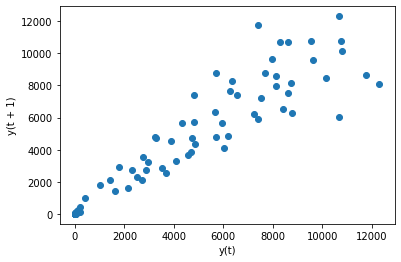

In [71]:
series = state_cases_ts['New York'].reset_index(drop=True).values

series = series[1:] - series[:-1] 

lag_plot(pd.Series(series))

pyplot.show()